In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [48]:
A = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

In [49]:
A.shape

(512, 512)

In [50]:
A.dtype

dtype('uint8')

In [51]:
A.max()

245

In [52]:
A = A/255
A.dtype

dtype('float64')

In [53]:
A.max()

0.9607843137254902

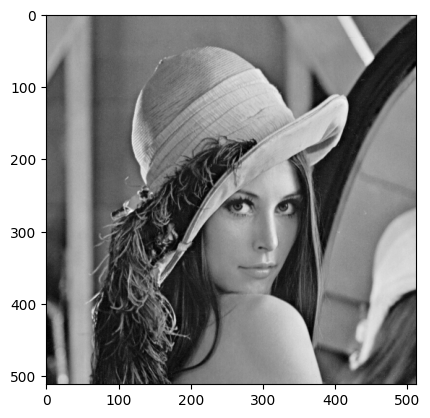

In [54]:
plt.imshow(A, cmap='gray')

In [55]:
B = A + 0.5
B[B>1] = 1

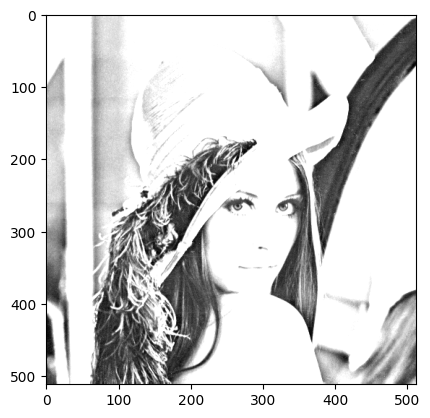

In [56]:
plt.imshow(B, cmap='gray')

In [57]:
A*255

array([[169., 169., 168., ..., 175., 162., 138.],
       [169., 169., 168., ..., 175., 162., 138.],
       [169., 169., 168., ..., 175., 162., 138.],
       ...,
       [ 53.,  53.,  59., ..., 115., 112., 114.],
       [ 53.,  53.,  64., ..., 117., 118., 122.],
       [ 53.,  53.,  64., ..., 117., 118., 122.]])

array([[0.1627451 , 0.1627451 , 0.15882353, ..., 0.18627451, 0.13529412,
        0.04117647],
       [0.1627451 , 0.1627451 , 0.15882353, ..., 0.18627451, 0.13529412,
        0.04117647],
       [0.1627451 , 0.1627451 , 0.15882353, ..., 0.18627451, 0.13529412,
        0.04117647],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

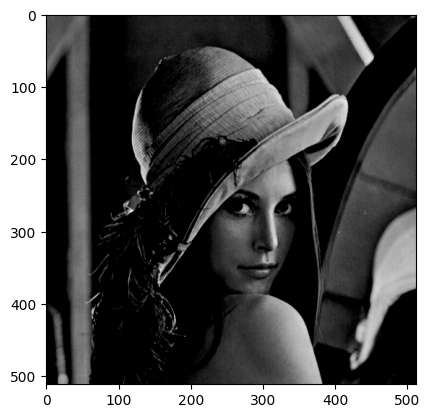

In [58]:
B = A - .5 
B[B<0] = 0
plt.imshow(B, cmap='gray')
B

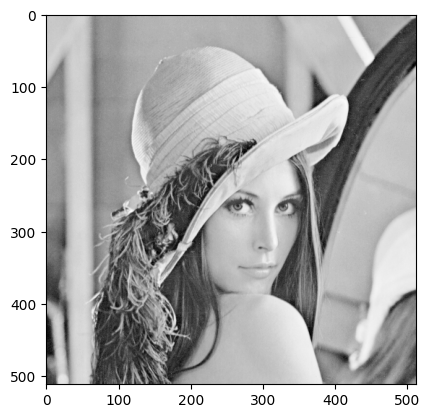

In [59]:
B = np.log(A)
plt.imshow(B, cmap='gray')

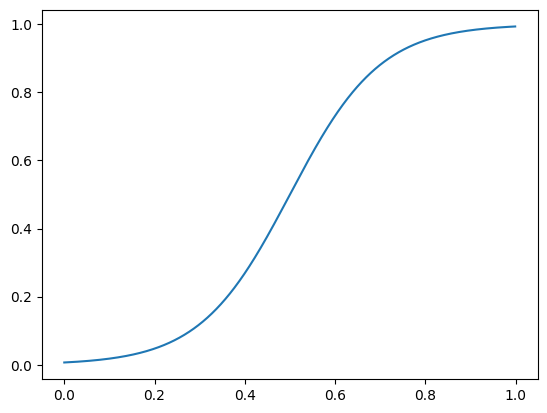

In [60]:
def f(x):
    return 1/(1 + np.exp(-10*x +5))
x = np.arange(0, 1, 1e-3)
y = f(x)
plt.plot(x,y)

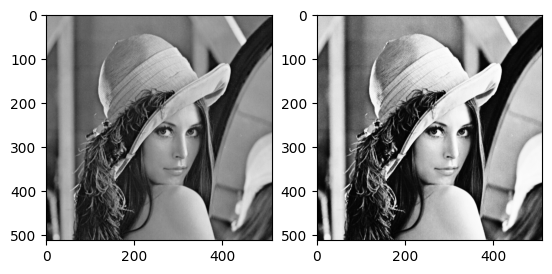

In [61]:
B = f(A)
plt.subplot(1,2,1)
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(B, cmap='gray')
plt.show()

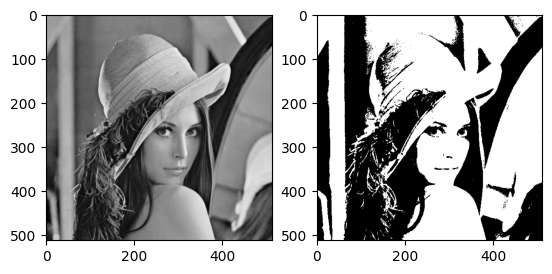

In [62]:
def threshold(x, th=0.5):
  y = x.copy()
  y[x >= th] = 1.
  y[x < th] = 0.
  return y

B = threshold(A)
plt.subplot(1,2,1)
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(B, cmap='gray')
plt.show()

In [63]:
def negative(x):
  return -x+1

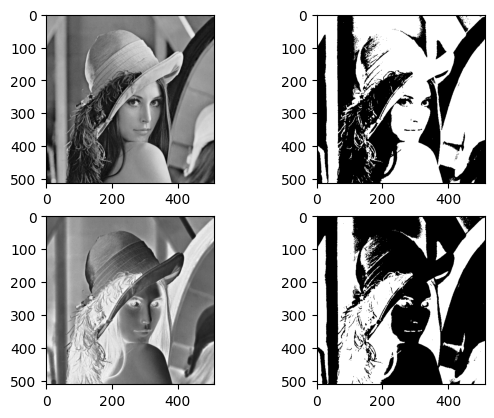

In [64]:
B = threshold(A)
plt.subplot(2,2,1)
plt.imshow(A, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(B, cmap='gray')
C = negative(B)
plt.subplot(2,2,4)
plt.imshow(C, cmap='gray')
D = negative(A)
plt.subplot(2,2,3)
plt.imshow(D, cmap='gray')
plt.show()

Bit plane

In [65]:
A.dtype

dtype('float64')

In [66]:
A = A*255

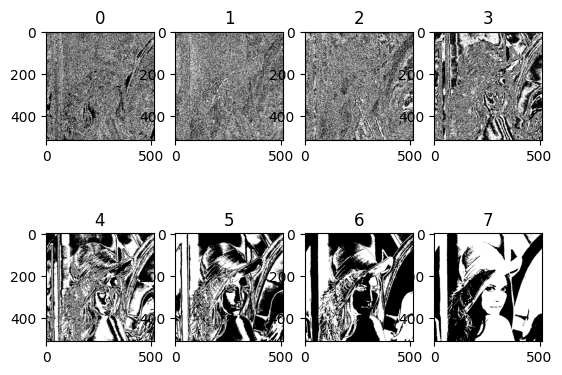

In [67]:
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(A // 2**i % 2, cmap='gray')
  plt.title(str(i))
plt.show()

In [68]:
def im2bp(im):
  bp = []
  for i in range(8):
    bp.append(im // 2**i % 2)
  return bp
def bp2im(bp):
  im = np.zeros(bp[0].shape)
  for i in range(8):
    im += bp[i] * 2 ** i
  return np.uint8(im)
def plotbp(bp):
  for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bp[i], cmap='gray')
    plt.title(str(i))
  plt.show()

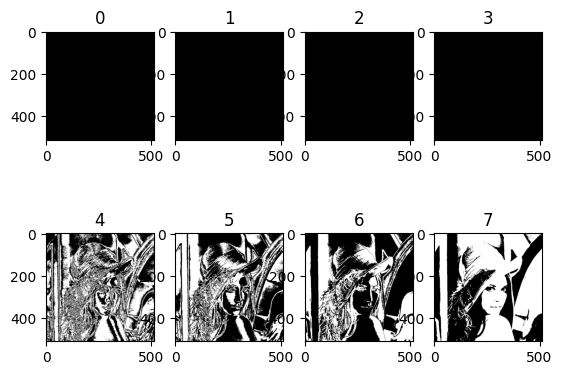

In [69]:
BP = im2bp(A)
#BP[0] = np.zeros(BP[0].shape, dtype=BP[0].dtype)
for i in range(4):
  BP[i] = np.zeros_like(BP[i])
plotbp(BP)

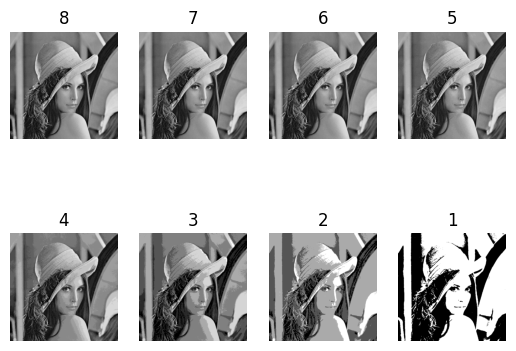

In [70]:
C = bp2im(BP)
BP = im2bp(A)
plt.subplot(2, 4, 1)
plt.imshow(A, cmap='gray')
plt.title('8')
plt.axis(False)
for i in range(7):
  BP[i] = np.zeros_like(BP[i])
  plt.subplot(2, 4, i+2)
  plt.imshow(bp2im(BP), cmap='gray')
  plt.title(str(7-i))
  plt.axis(False)
plt.show()

In [71]:
butt = cv2.imread('butterfly.png', cv2.IMREAD_GRAYSCALE)
butt.dtype

dtype('uint8')

In [72]:
butt.max()

255

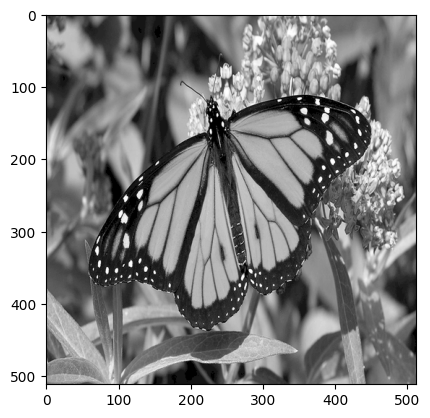

In [73]:
plt.imshow(butt, cmap='gray')

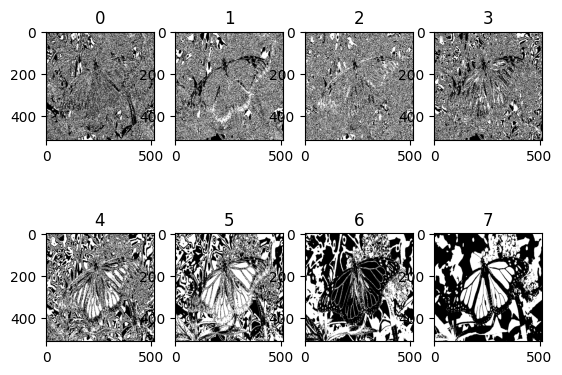

In [74]:
butt = im2bp(butt)
plotbp(butt)

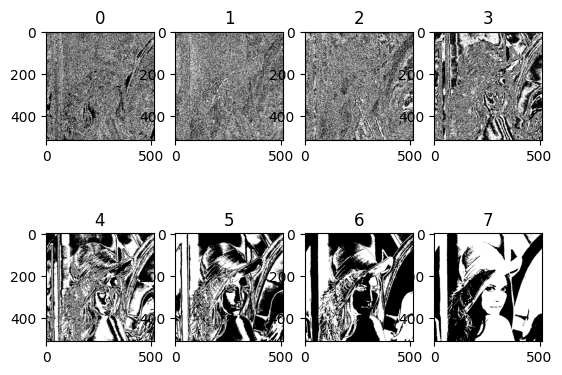

In [75]:
butt_lena = im2bp(A)
plotbp(butt_lena)

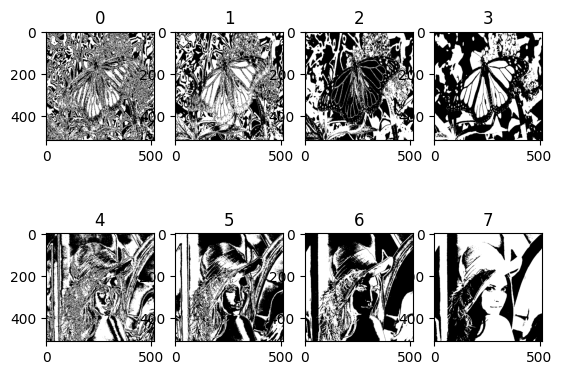

In [76]:
for i in range(4):
    butt_lena[i] = butt[4+i]
plotbp(butt_lena)

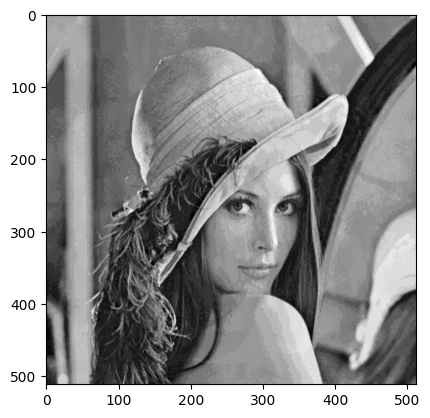

In [77]:
lena_butt = bp2im(butt_lena)
plt.imshow(lena_butt, cmap='gray')

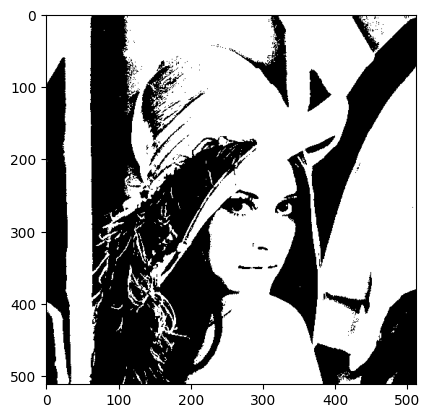

In [78]:
cv2.imwrite('lena_butt.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(B, cmap='gray')

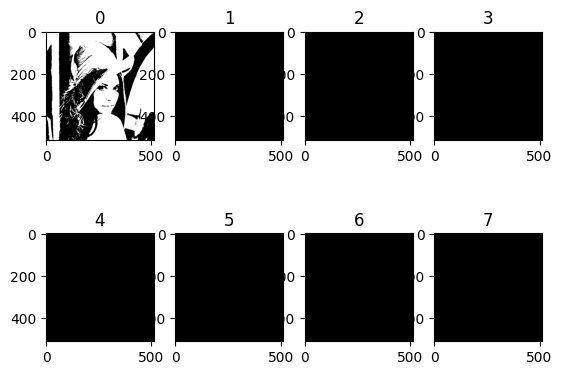

In [79]:
butt_B = im2bp(B)
plotbp(butt_B)

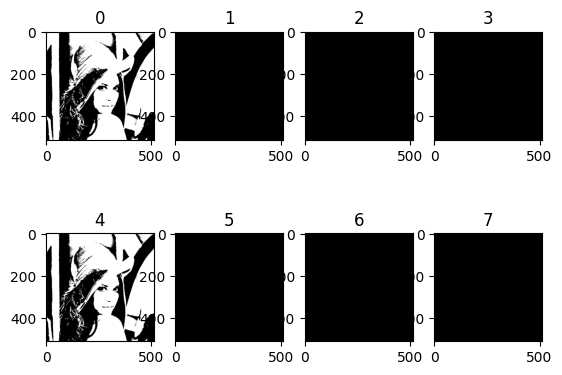

In [80]:
for i in range(4):
  butt_B[i+4] = butt_B[i]
plotbp(butt_B)

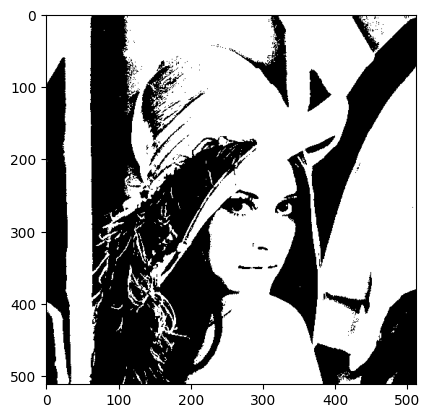

In [81]:
X = bp2im(butt_B)
plt.imshow(X, cmap='gray')

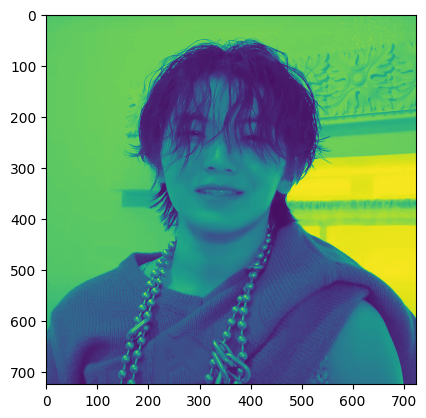

In [82]:
img = cv2.imread('Woozi.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

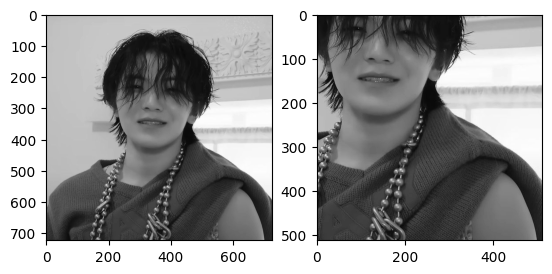

In [83]:
img = cv2.imread('Woozi.jpg', cv2.IMREAD_GRAYSCALE)
cropped_img = img[200:712 , 200:712]
cv2.imshow('Cropped Image', cropped_img)
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(cropped_img, cmap='gray')
plt.show()

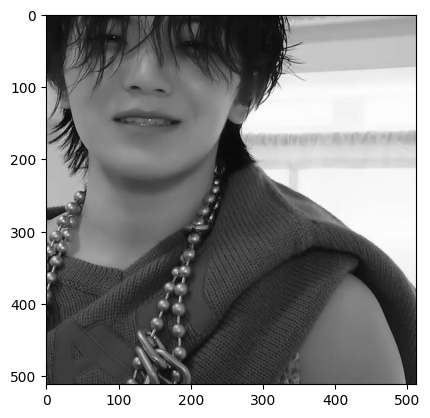

In [84]:
plt.imshow(cropped_img, cmap='gray')

In [85]:
cropped_img.dtype

dtype('uint8')

In [86]:
cropped_img.max()

255

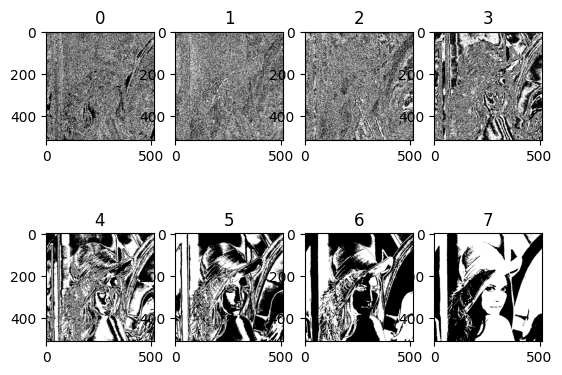

In [87]:
woozi_lena = im2bp(A)
plotbp(woozi_lena)

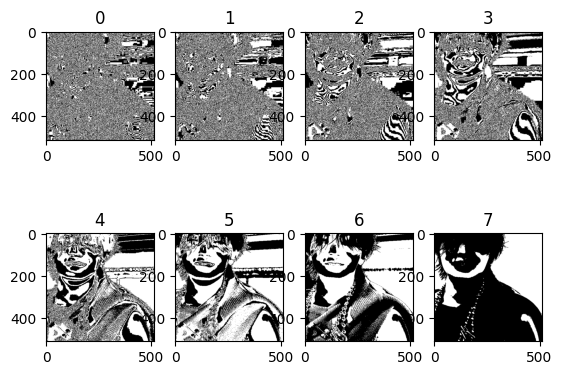

In [88]:
woozi = im2bp(cropped_img)
plotbp(woozi)

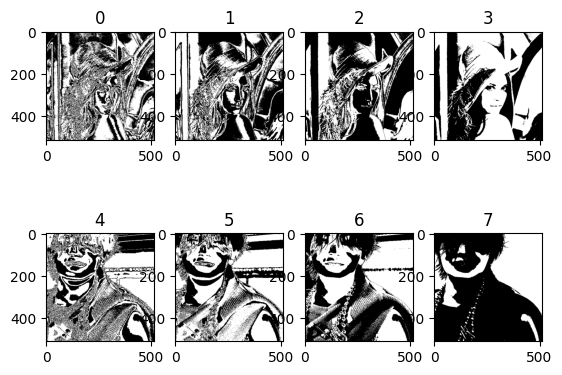

In [89]:
for i in range(4):
    woozi[i]= woozi_lena[4+i]
plotbp(woozi)

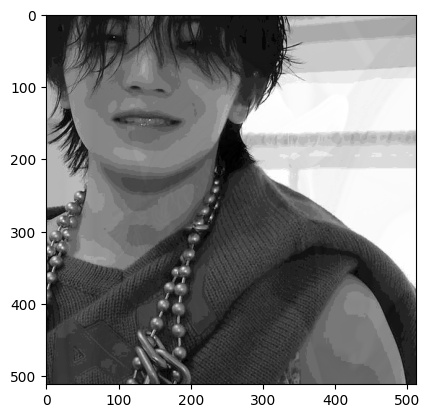

In [90]:
wozna = bp2im(woozi)
plt.imshow(wozna, cmap='gray')